In [1]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter
import numpy as np

In [2]:
# read sequnces from fasta file
def read_fasta(fasta_file):
    seqs = []
    with open(fasta_file) as f:
        for line in f:
            if line.startswith('>'):
                seqs.append('')
            else:
                seqs[-1] += line.strip()
    return seqs


In [3]:
variant_names = ["alpha", "beta", "gamma", "delta", "omicron"]
sequences = {}
for variant in variant_names:
    # read sequences
    sequences[variant] = read_fasta(f"./alignment_output/alignment_output_{variant}.fasta")

In [4]:
for variant in variant_names:
    lens = [len(s) for s in sequences[variant]]
    print(variant, "   \tmin len:", min(lens), "\tmax len:", max(lens))

alpha    	min len: 1277 	max len: 1277
beta    	min len: 1287 	max len: 1287
gamma    	min len: 1273 	max len: 1273
delta    	min len: 1289 	max len: 1289
omicron    	min len: 1286 	max len: 1286


In [5]:
frequencies = {}
for variant in variant_names:
    alignment = sequences[variant]
    alignment_length = len(alignment[0])
    unique_aa_counts = []
    total_aa_counts = []



    # Allign ettikten sonra her bir hizadaki(2000) unique aa sayısı bulundu
    for i in range(alignment_length):
        column = [seq[i] for seq in alignment]
        aa_counts = Counter(column)
        unique_aa_count = len(aa_counts)
        total_aa_count = len(column)
        unique_aa_counts.append(unique_aa_count)
        total_aa_counts.append(total_aa_count)


    # Burada bir sözlük yapısı oluşturulup her bir hizada bulunan en fazla aa hangisi ve kaç tane var o hizada onu bulduk
    m_c_a = {} 
    for i in range(alignment_length):
        target_column = [seq[i] for seq in alignment]
        aa_counts = Counter(target_column)
        most_common_aa, most_common_aa_count = aa_counts.most_common(1)[0]
        m_c_a[i] = {'most_common_aa': most_common_aa, 'count': most_common_aa_count}



    # Burada bulunma yüzdesini hesapladık
    freq = {} 
    for i in range(alignment_length):
        freq[i] = {'most_common_aa': m_c_a[i]["most_common_aa"], 'freq': m_c_a[i]["count"] / total_aa_counts[i]}

    values = []

    for key in freq:
        value = freq[key]["freq"]
        values.append(value)

    keys = list(freq.keys())

    # Burada değişkenlik gösterme yüzdesini hesapladık
    frequencies[variant] = [keys, [1-v for v in values]]

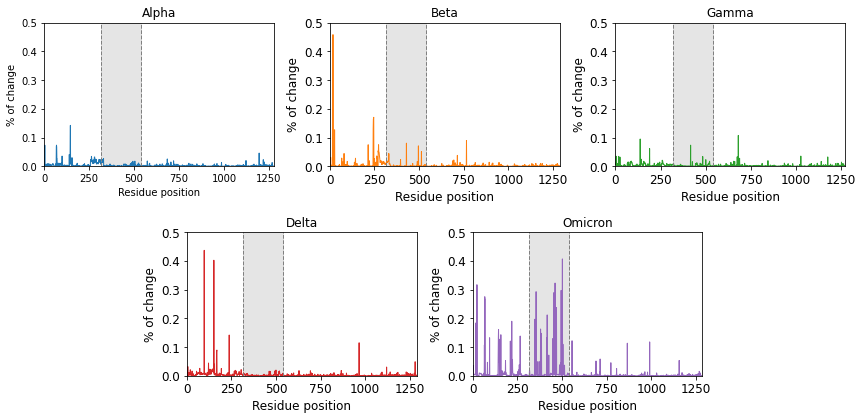

In [6]:
# draw a barplot for frequencies of each variant side by side 1 row 5 column
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 6)

for i in range(0, len(variant_names)):
    if i < 3:
        ax = plt.subplot(gs[0, 2 * i:2 * i + 2])
    else:
        ax = plt.subplot(gs[1, 2 * i - len(variant_names):2 * i + 2 - len(variant_names)])

    x = np.linspace(0, len(frequencies[variant_names[i]][1]), len(frequencies[variant_names[i]][1]))
    y = np.array(frequencies[variant_names[i]][1])
    ax.plot(x, y, color=f"C{i}", linewidth=1)
    #axs[i].bar(frequencies[variant_names[i]][0], frequencies[variant_names[i]][1])
    # make all texts in the figure to size 14

    ax.set_title(variant_names[i].capitalize())
    ax.set_xlabel("Residue position")
    ax.set_ylabel("% of change")
    ax.set_ylim([0, 0.5])
    ax.set_xlim([0, len(frequencies[variant_names[i]][1])])

    font_size = 12
    plt.rc('font', size=font_size)
    plt.rc('axes', titlesize=font_size)
    plt.rc('axes', labelsize=font_size)
    plt.rc('xtick', labelsize=font_size)
    plt.rc('ytick', labelsize=font_size)
    plt.rc('legend', fontsize=font_size)
    plt.rc('figure', titlesize=font_size)

    # add lines as x=317 and x=541 and fill the area between them
    ax.axvline(x=317, color='grey', linestyle='--', linewidth=1)
    ax.axvline(x=541, color='grey', linestyle='--', linewidth=1)
    ax.fill_between([317, 541], 0, 0.5, color='grey', alpha=0.2)


plt.tight_layout()
plt.savefig("variant_frequencies.pdf")
plt.show()


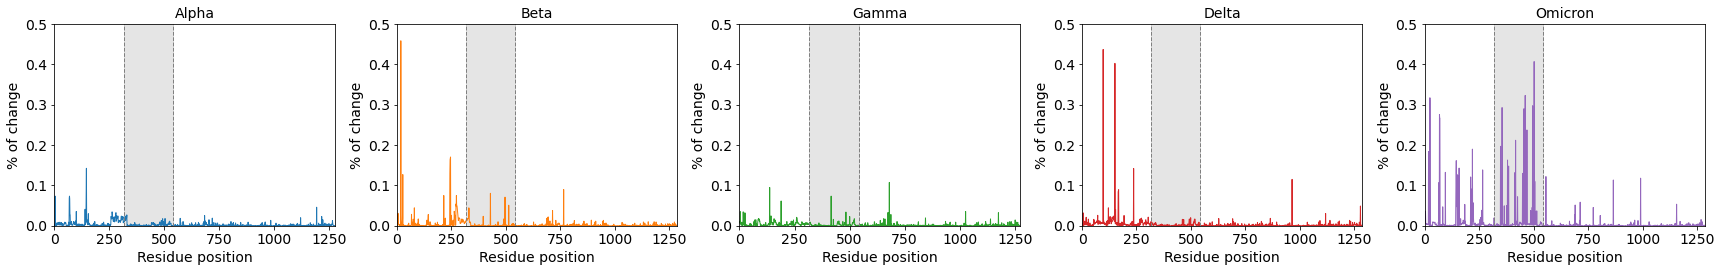

In [8]:
# draw a barplot for frequencies of each variant side by side 1 row 5 column
fig = plt.figure(figsize=(24, 4))
gs = gridspec.GridSpec(1, 5)

for i in range(0, len(variant_names)):
    ax = plt.subplot(gs[0, i])

    x = np.linspace(0, len(frequencies[variant_names[i]][1]), len(frequencies[variant_names[i]][1]))
    y = np.array(frequencies[variant_names[i]][1])
    ax.plot(x, y, color=f"C{i}", linewidth=1)
    
    ax.set_title(variant_names[i].capitalize())
    ax.set_xlabel("Residue position")
    ax.set_ylabel("% of change")
    ax.set_ylim([0, 0.5])
    ax.set_xlim([0, len(frequencies[variant_names[i]][1])])

    font_size = 14
    plt.rc('font', size=font_size)
    plt.rc('axes', titlesize=font_size)
    plt.rc('axes', labelsize=font_size)
    plt.rc('xtick', labelsize=font_size)
    plt.rc('ytick', labelsize=font_size)
    plt.rc('legend', fontsize=font_size)
    plt.rc('figure', titlesize=font_size)

    # add lines as x=317 and x=541 and fill the area between them
    ax.axvline(x=317, color='grey', linestyle='--', linewidth=1)
    ax.axvline(x=541, color='grey', linestyle='--', linewidth=1)
    ax.fill_between([317, 541], 0, 0.5, color='grey', alpha=0.2)


plt.tight_layout()
plt.savefig("variant_frequencies.pdf")
plt.show()


In [13]:
# find average frequency of change for each variant
average_frequencies = {}
for variant in variant_names:
    average_frequencies[variant] = np.mean(frequencies[variant][1])*1280
    print(variant, "average frequency of change:", average_frequencies[variant])

# find average frequency of change for each variant in the region between 317 and 541
average_frequencies = {}
for variant in variant_names:
    average_frequencies[variant] = np.mean(frequencies[variant][1][317:541])*224
    print(variant, "average frequency of change in the region between 317 and 541:", average_frequencies[variant])

alpha average frequency of change: 4.248457321848054
beta average frequency of change: 4.724662004661982
gamma average frequency of change: 3.4086410054987937
delta average frequency of change: 4.874724592707499
omicron average frequency of change: 10.884976671850673
alpha average frequency of change in the region between 317 and 541: 0.7189999999999954
beta average frequency of change in the region between 317 and 541: 0.7254999999999961
gamma average frequency of change in the region between 317 and 541: 0.5969999999999952
delta average frequency of change in the region between 317 and 541: 0.5284999999999951
omicron average frequency of change in the region between 317 and 541: 4.304999999999994
